In [ ]:
!pip install nvidia-modulus nvidia-modulus-sym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.9/291.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.6/582.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.1/772.1 kB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

# **Load libraries**

In [1]:
# install three Python packages: For using BERT, pre-processing text and ready-to-use datasets  in NLP
!pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim  #optimization algorithms for training neural networks
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model_repo = 'google/mt5-base'
model_path = '/content/drive/My Drive/MT5_NLP.pt'
max_seq_len = 20

# **Load Tokenizer and Visualize Samples of the Tokens**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


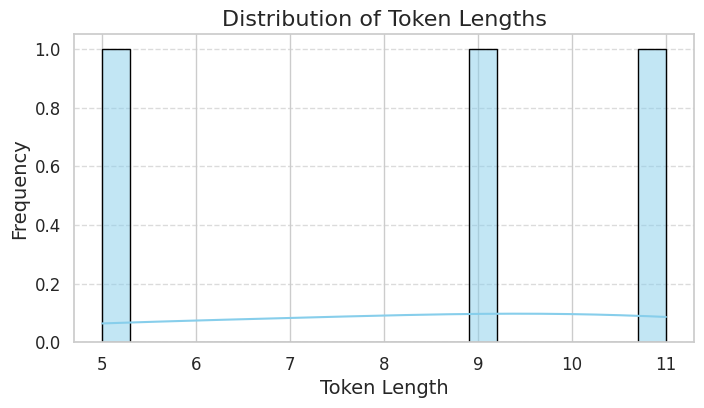

In [5]:
#selects an appropriate tokenizer based on the model architecture
tokenizer = AutoTokenizer.from_pretrained(model_repo)

# Sample text data
corpus = ["Sample sentence 1.", "Another sample sentence with more words.", "And a third sentence for illustration."]

# Tokenize the corpus using the selected tokenizer
token_lengths = []
for sentence in corpus:
    tokens = tokenizer.tokenize(sentence)
    token_lengths.append(len(tokens))

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of token lengths
plt.figure(figsize=(8, 4))
sns.histplot(token_lengths, bins=20, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Token Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Token Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Load The Model**

In [6]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#**There is 13 languages Codes :**

    "bg" - Bulgarian: усърден (usărden)
    "en" - English: hardworking
    "en_tok" - English (Tok Pisin): wok man
    "fil" - Filipino (Tagalog): masipag
    "hi" - Hindi: मेहनती (mehnati)
    "id" - Indonesian: rajin
    "ja" - Japanese: 勤勉な (kinben-na)
    "khm" - Khmer (Cambodian): សុខសប្បាយ (sok sabbay)
    "lo" - Lao: ມັນຕະຍົກ (man ta yak)
    "ms" - Malay: rajin
    "my" - Burmese: အလုပ်လုပ် (alup-lup)
    "th" - Thai: ขยัน (kayan)
    "vi" - Vietnamese: chăm chỉ
    "zh" - Chinese (Mandarin): 勤奋 (qín fèn)

# **Test Snipt**

In [7]:
token_ids = tokenizer.encode('<jp> Talk to me in Japanese please !',
    return_tensors='pt').cuda()
#IDs generated by tokenizing the input text
print("token_ids: ", token_ids)

#IDs generated by the model based on the input
model_out = model.generate(token_ids)
print("model_out: ", model_out)

# converting the token IDs in model_out back into human-readable text using the tokenizer.
output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print("output_text: ", output_text)

token_ids:  tensor([[ 1042,  3889,   669, 36308,   288,   416,   281, 30865, 10151,   259,
           309,     1]], device='cuda:0')


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


model_out:  tensor([[     0, 250099,    259,    264,    259,    291,      1]],
       device='cuda:0')
output_text:  <pad> <extra_id_0> - ?</s>


# **Tokenization example**

In [8]:
 #IDs generated by the tokenizer for the input string.
example_input_str = '<jp> I told you that i am japanese ! '

input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

#Convert Token IDs to Tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[ 1042,  3889,   669,   336,   259, 16694,   521,   533,   259,   266,
           728, 95167,   259,   309,     1]])
Tokens: ['▁<', 'jp', '>', '▁I', '▁', 'told', '▁you', '▁that', '▁', 'i', '▁am', '▁japanese', '▁', '!', '</s>']


# **Sort the tokens**

In [9]:
#sorts the vocabulary of the tokenizer based on the token IDs
sorted(tokenizer.vocab.items(), key=lambda x: x[1])

[('<pad>', 0),
 ('</s>', 1),
 ('<unk>', 2),
 ('<0x00>', 3),
 ('<0x01>', 4),
 ('<0x02>', 5),
 ('<0x03>', 6),
 ('<0x04>', 7),
 ('<0x05>', 8),
 ('<0x06>', 9),
 ('<0x07>', 10),
 ('<0x08>', 11),
 ('<0x09>', 12),
 ('<0x0A>', 13),
 ('<0x0B>', 14),
 ('<0x0C>', 15),
 ('<0x0D>', 16),
 ('<0x0E>', 17),
 ('<0x0F>', 18),
 ('<0x10>', 19),
 ('<0x11>', 20),
 ('<0x12>', 21),
 ('<0x13>', 22),
 ('<0x14>', 23),
 ('<0x15>', 24),
 ('<0x16>', 25),
 ('<0x17>', 26),
 ('<0x18>', 27),
 ('<0x19>', 28),
 ('<0x1A>', 29),
 ('<0x1B>', 30),
 ('<0x1C>', 31),
 ('<0x1D>', 32),
 ('<0x1E>', 33),
 ('<0x1F>', 34),
 ('<0x20>', 35),
 ('<0x21>', 36),
 ('<0x22>', 37),
 ('<0x23>', 38),
 ('<0x24>', 39),
 ('<0x25>', 40),
 ('<0x26>', 41),
 ('<0x27>', 42),
 ('<0x28>', 43),
 ('<0x29>', 44),
 ('<0x2A>', 45),
 ('<0x2B>', 46),
 ('<0x2C>', 47),
 ('<0x2D>', 48),
 ('<0x2E>', 49),
 ('<0x2F>', 50),
 ('<0x30>', 51),
 ('<0x31>', 52),
 ('<0x32>', 53),
 ('<0x33>', 54),
 ('<0x34>', 55),
 ('<0x35>', 56),
 ('<0x36>', 57),
 ('<0x37>', 58),
 ('<0x38>',

# **Load the Dataset**

In [11]:
dataset = load_dataset("alt")

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [13]:
#label train and test datasets
train_dataset = dataset['train']
test_dataset = dataset['test']

In [14]:
#Accessing train_dataset
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

# **Mapping 10 languages**

In [15]:
LANG_TOKEN_MAPPING = {
      'en' : '<en>',
      'fil': '<fil>',
      'hi' : '<hi>',
      'ja' : '<jp>',
      'ms' : '<ms>',
      'th' : '<th>',
      'zh' : '<zh>'
}

# **Make Special tokens Dictionary**

In [16]:
#value is a list of special tokens obtained from the values of LANG_TOKEN_MAPPING
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)

#ensures that the model's embedding layer is compatible with the modified vocabulary
model.resize_token_embeddings(len(tokenizer))

Embedding(250107, 768)

# **Tokenizes the input string and padding**

token_ids:  tensor([[250103,    336,    259,  16694,    521,    533,    259,    266,    728,
          95167,    259,    309,      1,      0,      0,      0,      0,      0,
              0,      0]])
tokens:  ['<jp>', '▁I', '▁', 'told', '▁you', '▁that', '▁', 'i', '▁am', '▁japanese', '▁', '!', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


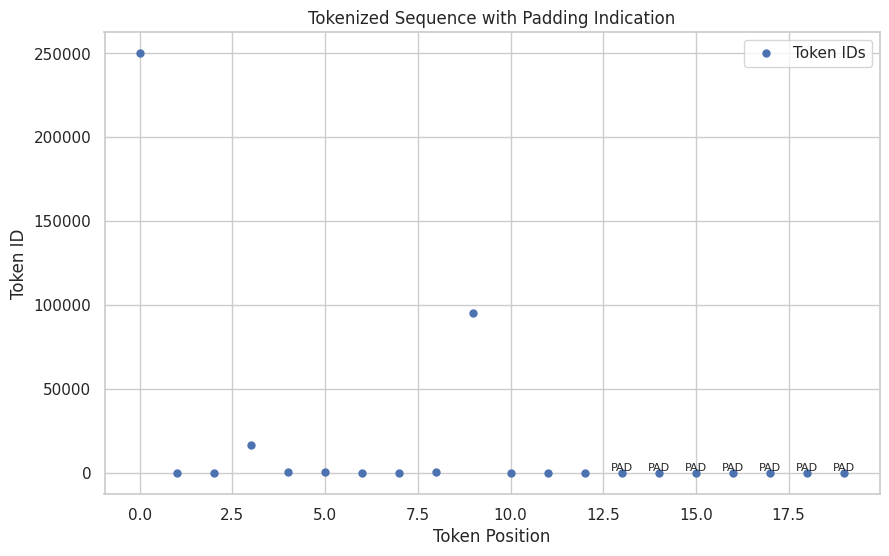

In [17]:
# tokenizes the input string
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt', padding='max_length',
    truncation=True, max_length=max_seq_len)
print("token_ids: ", token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print("tokens: ", tokens)
#Tokens without ▁ Prefix : a, .

# Plot token IDs with padding indication
plt.figure(figsize=(10, 6))
plt.plot(token_ids[0], marker='o', markersize=5, linestyle='', label='Token IDs')

# Add padding indication
for i, token_id in enumerate(token_ids[0]):
    if token_id == tokenizer.pad_token_id:
        plt.text(i, token_id, 'PAD', ha='center', va='bottom', fontsize=8)

plt.xlabel('Token Position')
plt.ylabel('Token ID')
plt.title('Tokenized Sequence with Padding Indication')
plt.legend()
plt.grid(True)
plt.show()

# **Tokenizes and encodes the input text with a target language**

In [18]:
# Tokenizes and encodes the input text with a target language
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

# Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

#Returns the token IDs of the encoded input text.
  return input_ids[0]

#tokenizes and encodes the target text.
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  #Returns the token IDs of the encoded target text
  return token_ids[0]

# prepares translation data for a batch.
def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

#transforms a batch of translation data
def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    # continue to the next translation set.
    if formatted_data is None:
      continue

    #append to arrays
    input_ids, target_ids = formatted_data

    #adding one or more singleton dimensions
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  #Concatenate the lists of input and target token IDs
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle() #to randomize the order of samples.
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    # transform the raw batch into input and target token
    # the generator is iterated over, it produces one batch of transformed data.
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

# **Test the previous functions**

<jp> ▁Itali ▁ telah ▁menga lahkan ▁Portugal ▁3 1-5 ▁dalam ▁Pool ▁C ▁pada ▁Pia la ▁ Dunia ▁Rag bi ▁2007 ▁di ▁Parc ▁des ▁Princes , ▁Paris , ▁Pe rancis . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ フランス の パリ 、 パル ク ・ デ ・ プラン ス で 行われた 2007 年 ラグビー ワールド カップ の プール C で 、 イタリア は 31 対 5 で ポル ト ガル を下 した 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

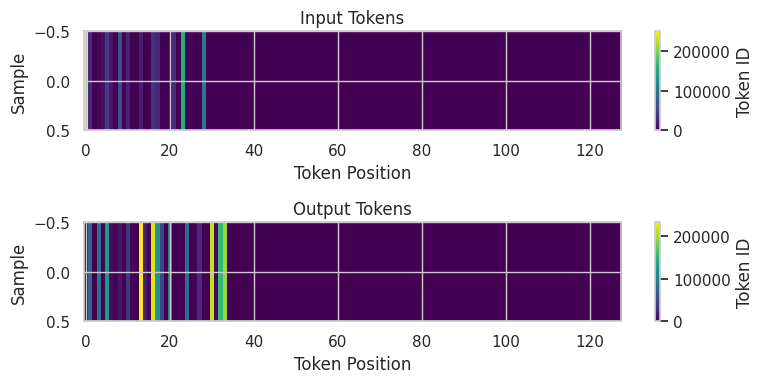

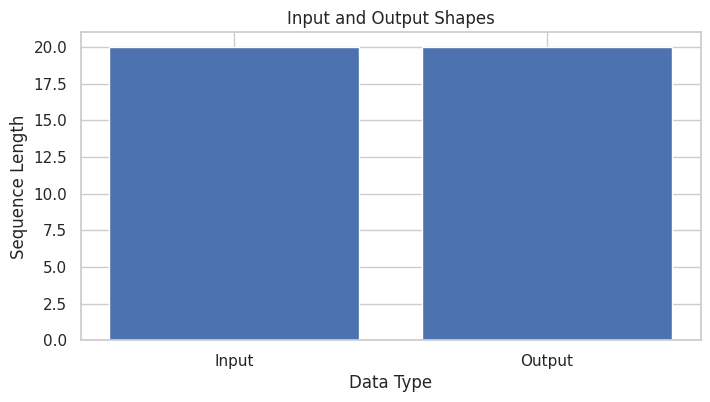

Input shape: torch.Size([8, 20])
Output shape: torch.Size([8, 20])


In [19]:
# Testing `format_translation_data`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Plot input tokens
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.title("Input Tokens")
plt.imshow([in_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

# Plot output tokens
plt.subplot(2, 1, 2)
plt.title("Output Tokens")
plt.imshow([out_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

plt.tight_layout()
plt.show()

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)

# Plot input and output shapes
plt.figure(figsize=(8, 4))
plt.bar(['Input', 'Output'], [data_batch[0].shape[1], data_batch[1].shape[1]])
plt.title('Input and Output Shapes')
plt.xlabel('Data Type')
plt.ylabel('Sequence Length')
plt.show()
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

#**Save the model**

In [20]:
torch.save(model.state_dict(), model_path)

# **Finetuning on MT5 pretrained model**

##loading the saved model

In [21]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [22]:
# define no.of epochs and another Constants
n_epochs = 8
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4 #equivalent to 5 * 10^(-4), which equals 0.0005
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)#prevent large updates to the model's parameters at the beginning of training

## Using AdamW Optimizer

In [23]:
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)#inc lr from 0 during the warm-up phase and then linearly dec it towards 0 during the remaining training steps.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [24]:
#computing the average loss over a specified number of batches
losses = []

# **Model Evaluation**

In [25]:
#evaluate a given model on a dataset
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  # iterate over batches of data
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    #Forward Propagation
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

# **Training Loop with Forward and Backward Propagation**

In [33]:
def get_predictions(model_out):
    # Extract the token IDs from the model's output
    output_ids = model_out.sequences.cuda().numpy()

    # Decode the token IDs into human-readable text
    predictions = []
    for output_id in output_ids:
        text = tokenizer.decode(output_id, skip_special_tokens=True)
        predictions.append(text)

    return predictions


In [27]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward propagartion:passing input data through the neural network
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward() # back propagartion: computes the gradients of the loss with respect to the model's parameters using automatic differentiation
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

<ipython-input-27-cd5b82e5b20b>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 11.500 | lr: 0.0002777777777777778
Epoch: 1 | Step: 100 | Avg. loss: 6.096 | lr: 0.0004994418396963608
Epoch: 1 | Step: 150 | Avg. loss: 4.804 | lr: 0.0004966510381781648
Epoch: 1 | Step: 200 | Avg. loss: 4.263 | lr: 0.0004938602366599688
Epoch: 1 | Step: 250 | Avg. loss: 3.963 | lr: 0.0004910694351417727
Epoch: 1 | Step: 300 | Avg. loss: 3.759 | lr: 0.0004882786336235767
Epoch: 1 | Step: 350 | Avg. loss: 3.601 | lr: 0.0004854878321053807
Epoch: 1 | Step: 400 | Avg. loss: 3.506 | lr: 0.00048269703058718467
Epoch: 1 | Step: 450 | Avg. loss: 3.416 | lr: 0.0004799062290689886
Epoch: 1 | Step: 500 | Avg. loss: 3.396 | lr: 0.00047711542755079264
Epoch: 1 | Step: 550 | Avg. loss: 3.266 | lr: 0.00047432462603259657
Epoch: 1 | Step: 600 | Avg. loss: 3.253 | lr: 0.00047153382451440055
Epoch: 1 | Step: 650 | Avg. loss: 3.212 | lr: 0.00046874302299620453
Epoch: 1 | Step: 700 | Avg. loss: 3.188 | lr: 0.00046595222147800846
Epoch: 1 | Step: 750 | Avg. loss: 3.094 | 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 2.915 | lr: 0.0004391047108729627
Epoch: 2 | Step: 100 | Avg. loss: 2.860 | lr: 0.00043631390935476675
Epoch: 2 | Step: 150 | Avg. loss: 2.785 | lr: 0.0004335231078365707
Epoch: 2 | Step: 200 | Avg. loss: 2.831 | lr: 0.0004307323063183746
Epoch: 2 | Step: 250 | Avg. loss: 2.772 | lr: 0.00042794150480017864
Epoch: 2 | Step: 300 | Avg. loss: 2.824 | lr: 0.00042515070328198257
Epoch: 2 | Step: 350 | Avg. loss: 2.707 | lr: 0.00042235990176378655
Epoch: 2 | Step: 400 | Avg. loss: 2.791 | lr: 0.00041956910024559054
Epoch: 2 | Step: 450 | Avg. loss: 2.788 | lr: 0.0004167782987273945
Epoch: 2 | Step: 500 | Avg. loss: 2.773 | lr: 0.0004139874972091985
Epoch: 2 | Step: 550 | Avg. loss: 2.696 | lr: 0.0004111966956910025
Epoch: 2 | Step: 600 | Avg. loss: 2.709 | lr: 0.0004084058941728064
Epoch: 2 | Step: 650 | Avg. loss: 2.684 | lr: 0.00040561509265461045
Epoch: 2 | Step: 700 | Avg. loss: 2.752 | lr: 0.0004028242911364144
Epoch: 2 | Step: 750 | Avg. loss: 2.732 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 2.509 | lr: 0.00037597678053136863
Epoch: 3 | Step: 100 | Avg. loss: 2.574 | lr: 0.00037318597901317256
Epoch: 3 | Step: 150 | Avg. loss: 2.489 | lr: 0.0003703951774949766
Epoch: 3 | Step: 200 | Avg. loss: 2.505 | lr: 0.0003676043759767805
Epoch: 3 | Step: 250 | Avg. loss: 2.581 | lr: 0.00036481357445858456
Epoch: 3 | Step: 300 | Avg. loss: 2.572 | lr: 0.0003620227729403885
Epoch: 3 | Step: 350 | Avg. loss: 2.491 | lr: 0.0003592319714221924
Epoch: 3 | Step: 400 | Avg. loss: 2.530 | lr: 0.00035644116990399646
Epoch: 3 | Step: 450 | Avg. loss: 2.616 | lr: 0.0003536503683858004
Epoch: 3 | Step: 500 | Avg. loss: 2.452 | lr: 0.0003508595668676044
Epoch: 3 | Step: 550 | Avg. loss: 2.437 | lr: 0.00034806876534940835
Epoch: 3 | Step: 600 | Avg. loss: 2.503 | lr: 0.00034527796383121233
Epoch: 3 | Step: 650 | Avg. loss: 2.581 | lr: 0.0003424871623130163
Epoch: 3 | Step: 700 | Avg. loss: 2.480 | lr: 0.0003396963607948203
Epoch: 3 | Step: 750 | Avg. loss: 2.518 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 2.406 | lr: 0.0003128488501897745
Epoch: 4 | Step: 100 | Avg. loss: 2.405 | lr: 0.0003100580486715785
Epoch: 4 | Step: 150 | Avg. loss: 2.345 | lr: 0.00030726724715338246
Epoch: 4 | Step: 200 | Avg. loss: 2.391 | lr: 0.00030447644563518644
Epoch: 4 | Step: 250 | Avg. loss: 2.413 | lr: 0.00030168564411699037
Epoch: 4 | Step: 300 | Avg. loss: 2.414 | lr: 0.0002988948425987944
Epoch: 4 | Step: 350 | Avg. loss: 2.357 | lr: 0.00029610404108059834
Epoch: 4 | Step: 400 | Avg. loss: 2.365 | lr: 0.0002933132395624023
Epoch: 4 | Step: 450 | Avg. loss: 2.352 | lr: 0.0002905224380442063
Epoch: 4 | Step: 500 | Avg. loss: 2.363 | lr: 0.00028773163652601023
Epoch: 4 | Step: 550 | Avg. loss: 2.374 | lr: 0.00028494083500781427
Epoch: 4 | Step: 600 | Avg. loss: 2.349 | lr: 0.0002821500334896182
Epoch: 4 | Step: 650 | Avg. loss: 2.302 | lr: 0.00027935923197142223
Epoch: 4 | Step: 700 | Avg. loss: 2.390 | lr: 0.00027656843045322616
Epoch: 4 | Step: 750 | Avg. loss: 2.425 |

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 2.238 | lr: 0.0002497209198481804
Epoch: 5 | Step: 100 | Avg. loss: 2.249 | lr: 0.0002469301183299844
Epoch: 5 | Step: 150 | Avg. loss: 2.285 | lr: 0.00024413931681178835
Epoch: 5 | Step: 200 | Avg. loss: 2.284 | lr: 0.00024134851529359234
Epoch: 5 | Step: 250 | Avg. loss: 2.261 | lr: 0.00023855771377539632
Epoch: 5 | Step: 300 | Avg. loss: 2.296 | lr: 0.00023576691225720027
Epoch: 5 | Step: 350 | Avg. loss: 2.261 | lr: 0.00023297611073900423
Epoch: 5 | Step: 400 | Avg. loss: 2.267 | lr: 0.0002301853092208082
Epoch: 5 | Step: 450 | Avg. loss: 2.282 | lr: 0.0002273945077026122
Epoch: 5 | Step: 500 | Avg. loss: 2.274 | lr: 0.00022460370618441618
Epoch: 5 | Step: 550 | Avg. loss: 2.242 | lr: 0.00022181290466622013
Epoch: 5 | Step: 600 | Avg. loss: 2.270 | lr: 0.00021902210314802412
Epoch: 5 | Step: 650 | Avg. loss: 2.281 | lr: 0.0002162313016298281
Epoch: 5 | Step: 700 | Avg. loss: 2.254 | lr: 0.00021344050011163208
Epoch: 5 | Step: 750 | Avg. loss: 2.271 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 2.179 | lr: 0.00018659298950658628
Epoch: 6 | Step: 100 | Avg. loss: 2.185 | lr: 0.00018380218798839026
Epoch: 6 | Step: 150 | Avg. loss: 2.157 | lr: 0.00018101138647019424
Epoch: 6 | Step: 200 | Avg. loss: 2.157 | lr: 0.00017822058495199823
Epoch: 6 | Step: 250 | Avg. loss: 2.158 | lr: 0.0001754297834338022
Epoch: 6 | Step: 300 | Avg. loss: 2.176 | lr: 0.00017263898191560617
Epoch: 6 | Step: 350 | Avg. loss: 2.149 | lr: 0.00016984818039741015
Epoch: 6 | Step: 400 | Avg. loss: 2.158 | lr: 0.0001670573788792141
Epoch: 6 | Step: 450 | Avg. loss: 2.169 | lr: 0.0001642665773610181
Epoch: 6 | Step: 500 | Avg. loss: 2.187 | lr: 0.00016147577584282204
Epoch: 6 | Step: 550 | Avg. loss: 2.143 | lr: 0.00015868497432462603
Epoch: 6 | Step: 600 | Avg. loss: 2.158 | lr: 0.00015589417280643
Epoch: 6 | Step: 650 | Avg. loss: 2.124 | lr: 0.000153103371288234
Epoch: 6 | Step: 700 | Avg. loss: 2.181 | lr: 0.00015031256977003795
Epoch: 6 | Step: 750 | Avg. loss: 2.201 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 2.112 | lr: 0.0001234650591649922
Epoch: 7 | Step: 100 | Avg. loss: 2.097 | lr: 0.00012067425764679617
Epoch: 7 | Step: 150 | Avg. loss: 2.079 | lr: 0.00011788345612860014
Epoch: 7 | Step: 200 | Avg. loss: 2.059 | lr: 0.0001150926546104041
Epoch: 7 | Step: 250 | Avg. loss: 2.102 | lr: 0.00011230185309220809
Epoch: 7 | Step: 300 | Avg. loss: 2.095 | lr: 0.00010951105157401206
Epoch: 7 | Step: 350 | Avg. loss: 2.045 | lr: 0.00010672025005581604
Epoch: 7 | Step: 400 | Avg. loss: 2.110 | lr: 0.00010392944853762
Epoch: 7 | Step: 450 | Avg. loss: 2.050 | lr: 0.00010113864701942398
Epoch: 7 | Step: 500 | Avg. loss: 2.050 | lr: 9.834784550122795e-05
Epoch: 7 | Step: 550 | Avg. loss: 2.087 | lr: 9.555704398303193e-05
Epoch: 7 | Step: 600 | Avg. loss: 2.009 | lr: 9.27662424648359e-05
Epoch: 7 | Step: 650 | Avg. loss: 2.078 | lr: 8.997544094663988e-05
Epoch: 7 | Step: 700 | Avg. loss: 2.036 | lr: 8.718463942844385e-05
Epoch: 7 | Step: 750 | Avg. loss: 2.090 | lr: 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 1.987 | lr: 6.0337128823398084e-05
Epoch: 8 | Step: 100 | Avg. loss: 1.993 | lr: 5.754632730520205e-05
Epoch: 8 | Step: 150 | Avg. loss: 2.039 | lr: 5.475552578700603e-05
Epoch: 8 | Step: 200 | Avg. loss: 2.003 | lr: 5.196472426881e-05
Epoch: 8 | Step: 250 | Avg. loss: 2.006 | lr: 4.9173922750613974e-05
Epoch: 8 | Step: 300 | Avg. loss: 2.048 | lr: 4.638312123241795e-05
Epoch: 8 | Step: 350 | Avg. loss: 1.978 | lr: 4.3592319714221926e-05
Epoch: 8 | Step: 400 | Avg. loss: 2.008 | lr: 4.08015181960259e-05
Epoch: 8 | Step: 450 | Avg. loss: 1.977 | lr: 3.801071667782988e-05
Epoch: 8 | Step: 500 | Avg. loss: 2.013 | lr: 3.521991515963385e-05
Epoch: 8 | Step: 550 | Avg. loss: 2.018 | lr: 3.2429113641437824e-05
Epoch: 8 | Step: 600 | Avg. loss: 2.017 | lr: 2.9638312123241796e-05
Epoch: 8 | Step: 650 | Avg. loss: 1.991 | lr: 2.684751060504577e-05
Epoch: 8 | Step: 700 | Avg. loss: 1.988 | lr: 2.405670908684974e-05
Epoch: 8 | Step: 750 | Avg. loss: 1.959 | lr: 2.

In [37]:
accuracies = []

for epoch_idx in range(n_epochs):
    # Randomize data order
    data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                        tokenizer, batch_size)

    for batch_idx, (input_batch, label_batch) in tqdm_notebook(enumerate(data_generator), total=n_batches):
        optimizer.zero_grad()

        # Forward propagartion: passing input data through the neural network
        model_out = model.forward(
            input_ids=input_batch,
            labels=label_batch)

        # Calculate loss
        loss = model_out.loss
        losses.append(loss.item())

        # Extract predictions
        predictions = torch.argmax(model_out.logits, dim=-1)  # Assuming model_out contains logits

        # Calculate accuracy
        batch_correct = torch.sum(predictions == label_batch).item()
        batch_accuracy = batch_correct / batch_size  # Assuming batch size is constant
        accuracies.append(batch_accuracy)

        # Back propagation: computes the gradients of the loss with respect to the model's parameters using automatic differentiation
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Print training update info
        if (batch_idx + 1) % print_freq == 0:
            avg_loss = np.mean(losses[-print_freq:])
            print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
                epoch_idx + 1, batch_idx + 1, avg_loss, scheduler.get_last_lr()[0]))

        if (batch_idx + 1) % checkpoint_freq == 0:
            test_loss = eval_model(model, test_dataset)
            print('Saving model with test loss of {:.3f}'.format(test_loss))
            torch.save(model.state_dict(), model_path)

# Calculate overall accuracy
total_correct = sum([batch_size * acc for acc in accuracies])
total_samples = len(accuracies) * batch_size
accuracy = total_correct / total_samples

print('Overall Accuracy: {:.2f}%'.format(accuracy * 100))

<ipython-input-37-8dbb0d9088c6>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_idx, (input_batch, label_batch) in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 1.940 | lr: 0.0
Epoch: 1 | Step: 100 | Avg. loss: 1.960 | lr: 0.0


OutOfMemoryError: CUDA out of memory. Tried to allocate 734.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 465.06 MiB is free. Process 2517 has 14.29 GiB memory in use. Of the allocated memory 13.50 GiB is allocated by PyTorch, and 677.20 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# **Loss Curve and Histogram of losses**

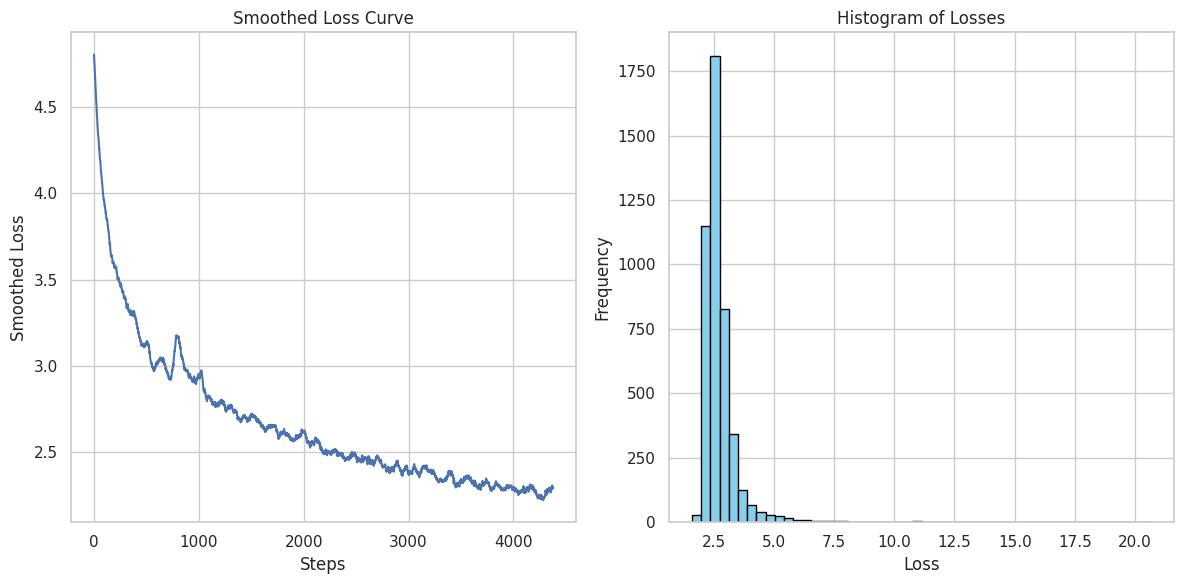

In [ ]:
# Graph the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

window_size = 50
smoothed_losses = []
for i in range(len(losses) - window_size):
    smoothed_losses.append(np.mean(losses[i:i + window_size]))

plt.plot(smoothed_losses[100:])
plt.xlabel('Steps')
plt.ylabel('Smoothed Loss')
plt.title('Smoothed Loss Curve')

# Plot histogram of losses
plt.subplot(1, 2, 2)
plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')

# Show the plot
plt.tight_layout()
plt.show()


# **Testing**

In [ ]:
# Prompt the user to enter the target language for translation
target_lang = input("Enter the target language (e.g., 'en' for English): ")

# Fetch the test sentence from the dataset (assuming it's in Filipino)
test_sentence = test_dataset[0]['translation']['ms']
print('Raw input text:', test_sentence)

# Encode the input sentence for translation into the specified target language
input_ids = encode_input_str(
    text=test_sentence,
    target_lang=target_lang,
    tokenizer=tokenizer,
    seq_len=model.config.max_length,
    lang_token_map=LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))


Enter the target language (e.g., 'en' for English): zh
Raw input text: Telah disahkan bahawa lapan kuda lumba thoroughbred di Tapak Lumba Randwick di Sydney telah dijangkiti influenza kuda.
Truncated input text: <zh> Telah disahkan bahawa lapan kuda lumba thoroughbred di Tapak L</s>


In [ ]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

目前已经确认有8名摩天轮跑者在洛杉矶的摩天
目前已经确认有8名摩天轮跑者在伦敦路易斯公园的
目前已经确认有8名摩天轮跑者在洛杉矶海岸公路上


In [ ]:
#@title Slick Blue Translate
input_text = 'Now saya boleh bercakap 10 bahasa! ' #@param {type:"string"}
output_language = 'en' #@param ["en", "ja", "zh", "bg","fil","id", "hi", "lo", "ms", "th"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

Now saya boleh bercakap 10 bahasa!   ->  Now I can speak 10 languages!
